In [12]:
# %load notebook_setup.py
#Use %load notebook_setup.py to load these commands at the top of your
#ipython notebook.  Includes running the std_libraries.py file. 

%run std_libraries.py
%load_ext autoreload
%autoreload 2
# %matplotlib 
# plt.ioff()
%matplotlib inline
#%matplotlib notebook

home directory is 
y1000plus_tools dir is 
y1000plus data dir is 
what computer are you on? a = Ben's laptop, b = gpucluster, c = Ben's desktop, d = otherb
home directory is /home/heineike/
y1000plus_tools dir is /home/heineike/github/y1000plus_tools/
y1000plus data dir is /home/heineike/genomes/y1000plus/
Importing y1000plus_tools.py
importing io_library.py
sys.path : 

['/home/heineike/github/y1000plus_tools/scripts', '', '/home/lab/envs/seqanalysis/lib/python35.zip', '/home/lab/envs/seqanalysis/lib/python3.5', '/home/lab/envs/seqanalysis/lib/python3.5/plat-linux', '/home/lab/envs/seqanalysis/lib/python3.5/lib-dynload', '/home/lab/envs/seqanalysis/lib/python3.5/site-packages', '/home/lab/envs/seqanalysis/lib/python3.5/site-packages/argh-0.26.1-py3.5.egg', '/home/lab/envs/seqanalysis/lib/python3.5/site-packages/glob2-0.4.1-py3.5.egg', '/home/lab/envs/seqanalysis/lib/python3.5/site-packages/mmtf_python-1.0.2-py3.5.egg', '/home/lab/envs/seqanalysis/lib/python3.5/site-packages/IPython/ex

# For a given set of species, show average Max GCN4 score for all genes, and compare to various metabolic pathways

In [ ]:
#Load species list
#spec list
#(C.Albicans, S.Cerevisiae, K.Lactis, H.Uvarum, W.Anamalous) 


#Load gene subset list

In [4]:
#Load y1000plus species table, make species_subset table 

specs_fig2 = [ 'Saccharomyces_cerevisiae', 'Kluyveromyces_lactis', 'Hanseniaspora_uvarum','Hanseniaspora_vineae' ,'Wickerhamomyces_anomalus', 'Candida_albicans']

y1000_species = pd.read_csv(y1000plus_dir + "y1000_species_table.csv", index_col=0)

fig2_to_orig = dict(zip(y1000_species['species_names_fig2'], y1000_species['original_genome_id']))

y1000_species_subset = y1000_species[y1000_species['species_names_fig2'].isin(specs_fig2)]



,original_genome_id,old_species_names,species_names_fig2,hex,id_table S1,Species name,Major clade,clade_order,Family,Genus,CUG usage,spec_og_id
ID,,,,,,,,,,,,
8,candida_albicans,Candida_albicans,Candida_albicans,#FFd200,123,Candida albicans,CUG-Ser1,8,Debaryomycetaceae,Candida,Ser,12
234,wickerhamomyces_anomalus,Wickerhamomyces_anomalus,Wickerhamomyces_anomalus,#00e4ff,222,Wickerhamomyces anomalus,Phaffomycetaceae,10,Phaffomycetaceae,Wickerhamomyces,Leu,139
267,kluyveromyces_lactis,Kluyveromyces_lactis,Kluyveromyces_lactis,#0012ff,270,Kluyveromyces lactis,Saccharomycetaceae,12,Saccharomycetaceae,Kluyveromyces,Leu,50
286,saccharomyces_cerevisiae,Saccharomyces_cerevisiae,Saccharomyces_cerevisiae,#0012ff,292,Saccharomyces cerevisiae,Saccharomycetaceae,12,Saccharomycetaceae,Saccharomyces,Leu,110
307,hanseniaspora_uvarum,Hanseniaspora_uvarum,Hanseniaspora_uvarum,#12958A,254,Hanseniaspora uvarum,Saccharomycodaceae,11,Saccharomycodaceae,Hanseniaspora,Leu,44
311,hanseniaspora_vinae,Hanseniaspora_vinae,Hanseniaspora_vineae,#12958A,256,Hanseniaspora vineae,Saccharomycodaceae,11,Saccharomycodaceae,Hanseniaspora,Leu,46


In [153]:
#Load AA metabolism genes, make goi_og_lookup
aa_met_genes = pd.read_csv(base_dir + os.path.normpath('data/gcn4_liron/aa_metabolism_genes.csv'), index_col=0)

gois = list(aa_met_genes.index)

#Make promoter files for various genes of interest
#Load S.Cer lookup table: 
scer_lookup_fname = y1000plus_dir + os.path.normpath('id_lookups/saccharomyces_cerevisiae.csv')

scer_lookup = pd.read_csv(scer_lookup_fname, index_col=0)
scer_lookup['SC_common_name'] = io_library.SC_common_name_lookup(scer_lookup.index)

y1000_id_lookup_common = dict(zip(scer_lookup['SC_common_name'], scer_lookup['y1000_id']))
sc_genename_lookup_common = dict(zip(scer_lookup['SC_common_name'],scer_lookup.index))

# target_y1000_id = scer_lookup.loc[goi,'y1000_id']

y1000_ids = dict(scer_lookup.loc[gois,'y1000_id'])
y1000_id_list = [y1000_ids[goi] for goi in gois]

goi_og_lookup, og_genes_lookup = y1000plus_tools.make_og_genes_lookup(y1000_id_list, y1000_species_subset)

more than one goi in same orthogroup :OG1030 found_genes: 
['110_4697', '110_4199']
more than one goi in same orthogroup :OG1096 found_genes: 
['110_946', '110_4987']
more than one goi in same orthogroup :OG1115 found_genes: 
['110_449', '110_827']
more than one goi in same orthogroup :OG1210 found_genes: 
['110_425', '110_1406']
more than one goi in same orthogroup :OG1313 found_genes: 
['110_3134', '110_447']
more than one goi in same orthogroup :OG1433 found_genes: 
['110_634', '110_2626']
more than one goi in same orthogroup :OG1516 found_genes: 
['110_695', '110_4813']
more than one goi in same orthogroup :OG1675 found_genes: 
['110_4331', '110_1965']
more than one goi in same orthogroup :OG1892 found_genes: 
['110_2273', '110_217']
more than one goi in same orthogroup :OG2588 found_genes: 
['110_4392', '110_1713']


In [8]:
#make pathway list
pathway_table = pd.read_csv(base_dir + os.path.normpath('data/gcn4_liron/scer_AABGs_pathways.csv'), index_col = 0)
all_pway_names = set()
for column in ['Pathway'+str(NN) for NN in range(1,5)]:
    all_pway_names = all_pway_names | (set(pathway_table[column]))

all_pway_names = all_pway_names - {np.nan}

all_pways = {pway : [] for pway in all_pway_names}


for (genename, (common_name, pway1,pway2, pway3, pway4)) in pathway_table.iterrows():
    for pway in [pway1,pway2, pway3, pway4]:
        if isinstance(pway, str):
            all_pways[pway].append(common_name)

            
#Combine overlapping pathways
all_pways['bcaa'] = list(set(all_pways['leu'] + all_pways['ile'] + all_pways['val'] + all_pways['branched']))
all_pways['aromatic'] = list(set(all_pways['chorismate'] + all_pways['phe'] + all_pways['trp'] + all_pways['tyr']))
all_pways['cys_met_thr'] = list(set(all_pways['homoserine']+all_pways['met']+all_pways['cys']+all_pways['thr']))

all_pways_combined_keys = list(set(all_pways.keys()) - set(['leu','ile','val','branched','chorismate','phe','trp','tyr','homoserine','met','cys','thr']))

all_pways_combined = {}
for pway in all_pways_combined_keys: 
    all_pways_combined[pway] = all_pways[pway]

all_pways_combined


{'arg': ['ARG1', 'ARG2', 'ARG3', 'ARG4', 'ARG5,6', 'ARG7', 'ARG8'],
 'aromatic': ['ARO1',
  'ARO4',
  'ARO3',
  'TYR1',
  'ARO9',
  'TRP1',
  'TRP2',
  'PHA2',
  'ARO7',
  'TRP5',
  'TRP3',
  'ARO2',
  'ARO8'],
 'asn': ['ASN2'],
 'asp': ['AAT1', 'AAT2', 'PYC2'],
 'bcaa': ['ILV2',
  'ILV6',
  'BAT2',
  'LEU1',
  'ILV3',
  'ILV5',
  'ILV1',
  'LEU4',
  'LEU2'],
 'cys_met_thr': ['THR1',
  'MET14',
  'MET17',
  'HOM2',
  'HOM6',
  'CYS4',
  'THR4',
  'CYS3',
  'MET7',
  'MET5',
  'MET3',
  'MET16',
  'HOM3',
  'MET2',
  'MET10',
  'MET6'],
 'gln': ['GLN1'],
 'glu': ['ALT1', 'GDH3', 'GLT1'],
 'gly': ['AGX1', 'GLY1'],
 'his': ['HIS1',
  'HIS2',
  'HIS3',
  'HIS4',
  'HIS5',
  'HIS6',
  'HIS7',
  'PRS1',
  'PRS3',
  'PRS4',
  'PRS5'],
 'lys': ['LYS1', 'LYS12', 'LYS2', 'LYS21', 'LYS4', 'LYS5', 'LYS9'],
 'pro': ['PRO1', 'PRO2', 'PRO3'],
 'ser': ['SER1', 'SER2', 'SER3', 'SHM1', 'SHM2']}

In [143]:
genome_name = fig2_to_orig[spec]
spec_og_id = spec_og_id_lookup[spec]

#make gene_id lookup for the species
gene_lookup_spec_fname = y1000plus_dir + "id_lookups/" + genome_name + '.csv'
gene_lookup_spec = pd.read_csv(gene_lookup_spec_fname, index_col='y1000_id')
y1000_id_gene_id_lookup = dict(gene_lookup_spec['gene_id'])

#Extract all promoters (files should be saved in advance)
#load all promoters for the species
all_promoters_fname = home_dir + os.path.normpath('github/expression_broad_data/expression_data/promoter_phylogeny/promoter_sets/' + genome_name + '/all_promoters.fasta')
all_promoters = SeqIO.parse(all_promoters_fname, "fasta")

all_promoters_id_to_L = {}
for seq in all_promoters:
    all_promoters_id_to_L[seq.id] = len(seq.seq)


In [146]:
spec

'Saccharomyces_cerevisiae'

In [161]:
#Build promhits data for all genes, genes activated by PKA inhibition (S.Cer, K.Lac), DEpka + orthologs (could also do de stress)

L_prom = 700
output_format = 'full'
#motif_dict = {'STRE': 'CCCCT', 'TATA': 'TATA[AT]A[AT][AG]', 'PDS': 'AGGGAT'} 
motif_hit_params = {'GCN4': (1e-3, home_dir + 'github/expression_broad_data/expression_data/motifs/GCN4_jaspar.meme', 'All')
#                     'LYS14':(1e-4, home_dir + 'github/expression_broad_data/expression_data/motifs/Lys14_intergenics_20190415.meme', 'All'),
#                     'LEU3': (1e-3, home_dir + 'github/expression_broad_data/expression_data/motifs/LEU3_jaspar_MA0324.1.meme','All'), 
#                     'ARG81': (1e-3, home_dir + 'github/expression_broad_data/expression_data/motifs/ARG81_jaspar_MA0272.1.meme', 'All'),
#                     'MET32': (1e-3, home_dir + 'github/expression_broad_data/expression_data/motifs/MET32_jaspar_MA0333.1.meme', 'All')
                   }
#sequence_context = 2  

spec_og_id_lookup = dict(zip(y1000_species_subset['species_names_fig2'], y1000_species_subset['spec_og_id']))

#for each species
prom_hits = {}
for spec in specs_fig2: 
    #spec = 'Candida_albicans'
    #    = 'Wickerhamomyces_anomalus'#'Candida_albicans'
    genome_name = fig2_to_orig[spec]
    spec_og_id = spec_og_id_lookup[spec]

    #make gene_id lookup for the species
    gene_lookup_spec_fname = y1000plus_dir + "id_lookups/" + genome_name + '.csv'
    gene_lookup_spec = pd.read_csv(gene_lookup_spec_fname, index_col='y1000_id')
    y1000_id_gene_id_lookup = dict(gene_lookup_spec['gene_id'])

    #Extract all promoters (files should be saved in advance)
    #load all promoters for the species
    all_promoters_fname = home_dir + os.path.normpath('github/expression_broad_data/expression_data/promoter_phylogeny/promoter_sets/' + genome_name + '/all_promoters.fasta')
    all_promoters = SeqIO.parse(all_promoters_fname, "fasta")

    all_promoters_id_to_L = {}
    for seq in all_promoters:
        all_promoters_id_to_L[seq.id] = len(seq.seq)


    # for seq in prot_seqs: 
    #     if seq.id.split('Seq')[0]== outgroup_orig_genome+'_':


    fname_prefix = genome_name + '_all_' 




    #Make dataframe to store hits
    prom_hits_spec = pd.DataFrame.from_dict(all_promoters_id_to_L, orient='index', columns = ['L_prom'])
    # y1000_id_to_Lprom_df = pd.DataFrame.from_dict(y1000_id_to_Lprom, orient='index', columns = ['Lprom'])
    # goi_hits = goi_hits.merge(y1000_id_to_Lprom_df, how = 'outer', left_index=True, right_index=True)

    #make database with fimo hits for each gene
    for motif_name, (thresh, motif_fname, motif_in_file) in motif_hit_params.items(): 
        fimo_hits = y1000plus_tools.promoter_scan_fimo(all_promoters_fname, fname_prefix, motif_name, motif_fname, thresh, motif_in_file='All')   

        fimo_hits_motif = {}
        #for each gene in the genome, make list of hits and scores

        for (genename, prom_hits_row) in prom_hits_spec.iterrows():
            genename
            prom_Lprom = prom_hits_row['L_prom']



            fimo_hits_subset = fimo_hits[fimo_hits['sequence_name']==genename]
            if len(fimo_hits_subset)>0:     
                #                prom_Lprom = y1000_id_to_Lprom[y1000_id]
                #prom_hits = fimo_hits[fimo_hits['sequence_name']==y1000_id]

                #Location is distance from the start codon
                locs = []
                strands = []
                pvals = []
                seqs = []

                for jj,fimo_hits_row in fimo_hits_subset.iterrows():
                    #Just recording location of the start of the motif
                    strand = fimo_hits_row['strand']

                    if strand == '-':
                        loc = prom_Lprom-fimo_hits_row['stop']
                    elif strand == '+': 
                        loc = prom_Lprom-fimo_hits_row['start']

                    if loc<L_prom: 
                        strands.append(strand)
                        locs.append(loc)
                        seqs.append(fimo_hits_row['matched_sequence'])
                        pvals.append(fimo_hits_row['p-value'])

                #identify best pval and store as single value

                if len(strands)>0:
                    best_ind = np.argmin(pvals)
                    best = np.min(pvals)

                    fimo_hits_motif[genename]=(locs, strands, pvals, seqs, best, best_ind)

        fimo_hits_motif_df = pd.DataFrame.from_dict(fimo_hits_motif, orient='index', columns = [motif_name + '_location', motif_name+ '_strand',motif_name + '_pval', motif_name + '_sequence', motif_name +'_best', motif_name + '_best_ind'])

        prom_hits_spec = prom_hits_spec.merge(fimo_hits_motif_df, how = 'left', left_index =True, right_index = True)

    prom_hits[spec] = prom_hits_spec



fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.001 /home/heineike/github/expression_broad_data/expression_data/motifs/GCN4_jaspar.meme /home/heineike/github/expression_broad_data/expression_data/promoter_phylogeny/promoter_sets/saccharomyces_cerevisiae/all_promoters.fasta
fimo output return code = 0
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.001 /home/heineike/github/expression_broad_data/expression_data/motifs/GCN4_jaspar.meme /home/heineike/github/expression_broad_data/expression_data/promoter_phylogeny/promoter_sets/kluyveromyces_lactis/all_promoters.fasta
fimo output return code = 0
fimo command:
/home/heineike/meme/bin/fimo --oc /home/heineike/genomes/y1000plus/fimo_results/ --verbosity 1 --thresh 0.001 /home/heineike/github/expression_broad_data/expression_data/motifs/GCN4_jaspar.meme /home/heineike/github/expression_broad_data/expr

In [167]:
motif_scores = {}
for spec in specs_fig2: 

    genome_name = fig2_to_orig[spec]
    spec_og_id = spec_og_id_lookup[spec]

    #make gene_id lookup for the species
    gene_lookup_spec_fname = y1000plus_dir + "id_lookups/" + genome_name + '.csv'
    gene_lookup_spec = pd.read_csv(gene_lookup_spec_fname, index_col='y1000_id')
    y1000_id_gene_id_lookup = dict(gene_lookup_spec['gene_id'])
    
    #For each gene set
    motif_scores_spec = {}
    for gene_set_name, gene_set in all_pways_combined.items(): 

        N_orths = []
        y1000_ids = []
        gene_ids = []
        pvals =  {motif_name:[] for motif_name in motif_hit_params.keys()}
        best_pvals =  {motif_name:[] for motif_name in motif_hit_params.keys()}
        for sc_common_name in gene_set: 
        #sc_common_name = 'MET5'    

            if spec == 'Saccharomyces_cerevisiae': 
                gene_id = sc_genename_lookup_common[sc_common_name]
                y1000_ids_gene = [y1000_id_lookup_common[sc_common_name]]
                gene_ids_gene = [gene_id]

                N_orths.append(1)
                y1000_ids.append(y1000_ids_gene)
                gene_ids.append(gene_ids_gene)

                for motif_name in motif_hit_params.keys():
                    best_pval = prom_hits[spec].loc[gene_id,:][motif_name + '_best']
                    pvals[motif_name].append([best_pval])
                    best_pvals[motif_name].append(best_pval)

            else:
                sc_y1000_id = y1000_id_lookup_common[sc_common_name]
                og = goi_og_lookup[sc_y1000_id]
                og_genes = og_genes_lookup[og]

                y1000_ids_gene = []
                gene_ids_gene = []
                pvals_gene = {motif_name:[] for motif_name in motif_hit_params.keys()}
                for og_gene in og_genes:
                    spec_id=og_gene.split('_')[0]
                    if spec_id==str(spec_og_id):
                        y1000_ids_gene.append(og_gene)
                        gene_id = genome_name + '@' + y1000_id_gene_id_lookup[og_gene]
                        gene_ids_gene.append(gene_id)
                        for motif_name in motif_hit_params.keys():
                            pvals_gene[motif_name].append(prom_hits[spec].loc[gene_id,:][motif_name + '_best'])


                N_orths_gene = len(y1000_ids_gene)
                N_orths.append(N_orths_gene)
                y1000_ids.append(y1000_ids_gene)
                gene_ids.append(gene_ids_gene)



                for motif_name in motif_hit_params.keys():
                    pvals[motif_name].append(pvals_gene[motif_name])
                    if N_orths_gene >0:
                        best_pvals[motif_name].append(min(pvals_gene[motif_name]))
                    else:
                        best_pvals[motif_name].append(np.nan)

        motif_scores_gene_set = pd.DataFrame({'N_orths':N_orths, 
                                              'y1000_ids':y1000_ids, 
                                              'gene_ids': gene_ids 
                                             }, index=gene_set)

        for motif_name in motif_hit_params.keys():
            motif_scores_gene_set[motif_name + '_pvals'] = pvals[motif_name]
            motif_scores_gene_set[motif_name + '_best_pvals'] = best_pvals[motif_name]

        motif_scores_spec[gene_set_name] = motif_scores_gene_set 

    motif_scores[spec]=motif_scores_spec



In [169]:
motif_scores

{'Candida_albicans': {'arg':         N_orths                                           gene_ids  \
  ARG1          1                     [candida_albicans@CR_00620C_A]   
  ARG2          1                     [candida_albicans@C1_05020C_A]   
  ARG3          1                     [candida_albicans@C6_03230W_A]   
  ARG4          2  [candida_albicans@C7_03570W_A, candida_albican...   
  ARG5,6        1                     [candida_albicans@C1_09290C_A]   
  ARG7          1                     [candida_albicans@C7_02150C_A]   
  ARG8          1                     [candida_albicans@C4_05070C_A]   
  
                   y1000_ids           GCN4_pvals  GCN4_best_pvals  
  ARG1             [12_1101]           [8.78e-05]         0.000088  
  ARG2             [12_4549]           [1.93e-06]         0.000002  
  ARG3             [12_1177]           [0.000137]         0.000137  
  ARG4    [12_1205, 12_4093]  [0.00013, 0.000153]         0.000130  
  ARG5,6            [12_682]           [5.06e-06]

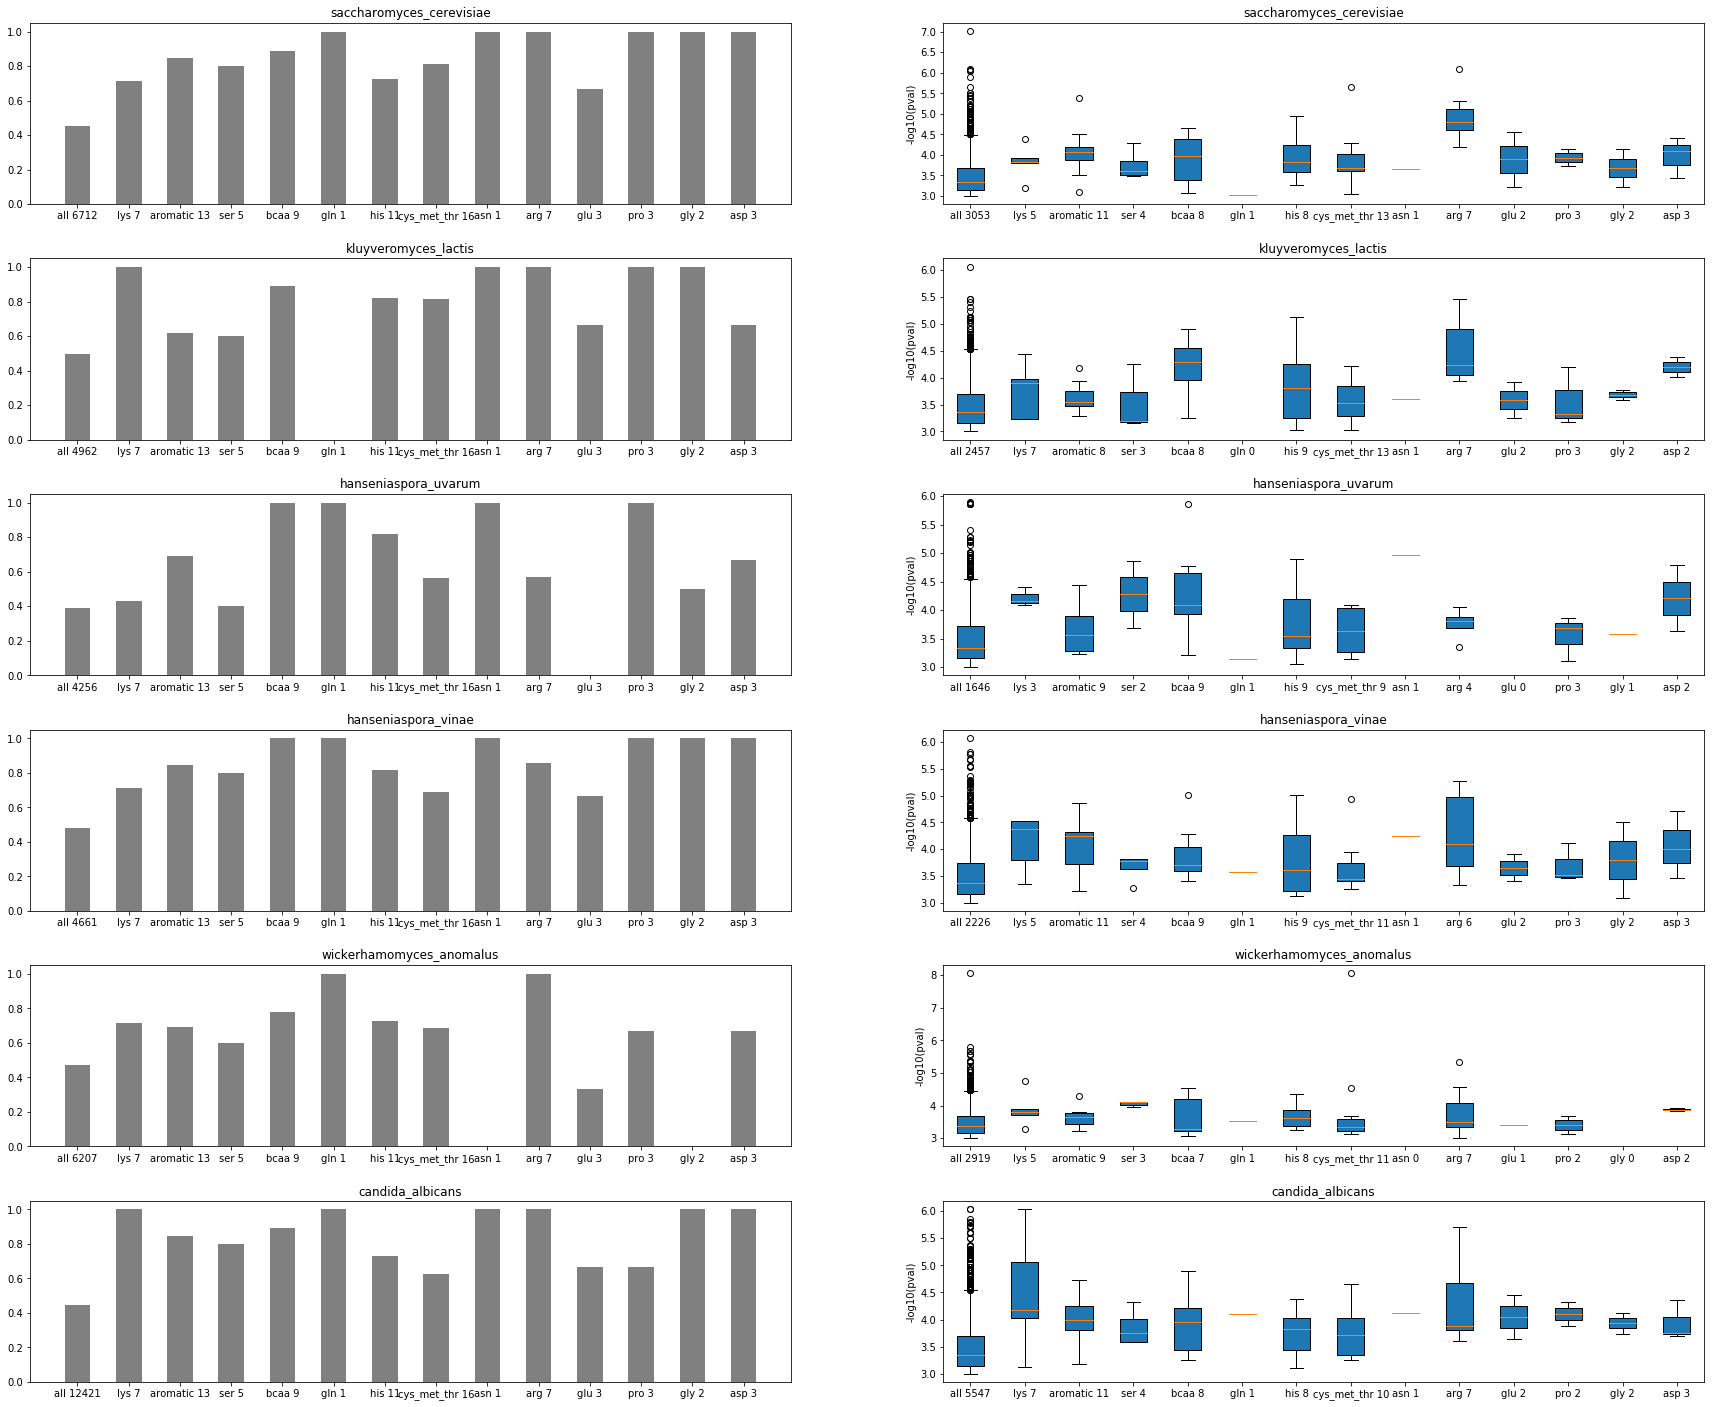

In [175]:
#Plot 
# a) percentage of promoters that have no gcn4 motifs
# b) distribution of pvalues for those that meet the threshold

motif_name = 'GCN4'

fig,axarr = plt.subplots(len(specs_fig2),2, figsize=(30,25))
fig.subplots_adjust(hspace = 0.3)

for kk,spec in enumerate(specs_fig2):
    genome_name = fig2_to_orig[spec]
    index = [0]
    data_pct = []
    data_tot = []
    data_pvals = []
    labels_all = []
    labels_hits = []

    bw = 0.5
    opacity = 0.8
    plot_colors = ({'pct':'grey', 
                    'pval': 'red'
                   })

    #Get data for all promoters in the species

    motif_pvals = prom_hits[spec][motif_name + '_best']
    motif_pvals_notna = motif_pvals[~(motif_pvals.isna())]
    tot = len(motif_pvals)
    pct = len(motif_pvals_notna)/tot
    data_pct.append(pct)
    data_tot.append(tot)
    data_pvals.append(-np.log10(motif_pvals_notna))
    labels_all.append('all {}'.format(tot))
    labels_hits.append('all {}'.format(len(motif_pvals_notna)))
    #arrange data for subsets    
    for jj, gene_set_name in enumerate(all_pways_combined.keys()):
        index.append(jj+1)
        motif_pvals = motif_scores[spec][gene_set_name][motif_name + '_best_pvals']
        motif_pvals_notna = motif_pvals[~(motif_pvals.isna())]
        tot = len(motif_pvals)
        pct = len(motif_pvals_notna)/tot
        data_pct.append(pct)
        data_tot.append(tot)
        data_pvals.append(-np.log10(motif_pvals_notna))
        labels_all.append('{} {}'.format(gene_set_name, tot))
        labels_hits.append('{} {}'.format(gene_set_name, len(motif_pvals_notna)))



    ax = axarr[kk,0]
    ax.bar(index,data_pct, bw, color=plot_colors['pct'],label=labels) 
                     #bottom = bottom)
    ax.set_ylim([0,1.05])
#     for jj, tot in enumerate(data_tot): 
#         ax.text(index[jj],1.1,str(tot))

    ax.set_xticks(index)
    #if kk==(len(specs_fig2)-1): 
    ax.set_xticklabels(labels_all)
    ax.set_title(genome_name)

    ax = axarr[kk,1]

    ax.boxplot(data_pvals, patch_artist=True, showfliers=True, 
                                              positions = index, 
                                              widths = bw) #, whis = 0.0)
    ax.set_xticks(index)
    #if kk==(len(specs_fig2)-1): 
    ax.set_xticklabels(labels_hits)
    ax.set_ylabel('-log10(pval)')
    ax.set_title(genome_name)

fig.savefig(os.path.normpath('/home/heineike/scratch/GCN4_all_genes.svg'),bbox_inches='tight')

In [132]:


# spec_sets = {'Post WGH low' : ['Scer'] + spec_order_post_WGH, 
#              'Post WGH high' : ['Scer'] + spec_order_post_WGH, 
#              'Pre WGH' : ['Klac'] + spec_order_pre_WGH} 

# colors = {'all':'green', 'low': 'blue', 'high':'red', 'Pre WGH': 'purple'}
# legend_labels = {'all':'All genes in species', 'low': '$DE_{PKA}$ low-induction syntenic orthologs', 
#                  'high':'$DE_{PKA}$ high-induction syntenic orthologs', 'Pre WGH': '$DE_{PKA}$ shared orthologs'}
# index = {'all':[], 'low':[],'high':[], 'Pre WGH':[]}
# data = {'all':[], 'low':[],'high':[], 'Pre WGH':[]}
# label_order = []
# jj = 0

# #Post WGH Species
# #assumes the same species sets are in both
# for spec in spec_sets['Post WGH high']: 
#     label_order.append(spec)        
#     index['all'].append(jj)
#     index['low'].append(jj+bw)
#     index['high'].append(jj+bw*2)
#     data['all'].append(motif_calcs['Post WGH high'][spec]['all'][motif_name]['pct'])
#     data['low'].append(motif_calcs['Post WGH low'][spec]['goi'][motif_name]['pct'])
#     data['high'].append(motif_calcs['Post WGH high'][spec]['goi'][motif_name]['pct'])    
#     jj = jj+1

# #pre WGH Species
# #assumes the same species sets are in both
# for spec in spec_sets['Pre WGH']: 
#     label_order.append(spec)        
#     index['all'].append(jj)
#     index['Pre WGH'].append(jj+bw)
#     data['all'].append(motif_calcs['Pre WGH'][spec]['all'][motif_name]['pct'])
#     data['Pre WGH'].append(motif_calcs['Pre WGH'][spec]['goi'][motif_name]['pct'])
#     jj = jj+1

    
# for subset_name, subset_data in data.items(): 
    
#     pct_plot = ax_pct.bar(index[subset_name],subset_data, bw,
#                  alpha=opacity,
#                  color=colors[subset_name],
#                  label=legend_labels[subset_name]) 
#                  #bottom = bottom)

# ax_pct.vlines([len(index['low'])-0.25], ymin = 0, ymax = 1.0, colors = 'gray',linewidth=3)
# ax_pct.set_xticklabels(label_order)
# ax_pct.set_xticks(index['all'])
# ax_pct.set_ylim(0,1.0)
# ax_pct.set_ylabel('Pct promoters with 1 or more STRE')
# ax_pct.legend(loc = 'upper left', bbox_to_anchor = (1.0,1.0))

# fig_pct.savefig(os.path.normpath('/home/heineike/scratch/STRE_conservation_summary.svg'),bbox_inches='tight')